# 2022 Summer Workshop Series
## Modeling & Model Assessment
## 9/1/2022

A crash course in modeling

In [130]:
## Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix

import warnings 
import seaborn as sns

#For Jupyter Notebooks only
%matplotlib inline

In [117]:
## Set working directory
os.chdir('C:/Users/INSERT YOUR DIRECTORY HERE')
print("Current Working Directory " , os.getcwd())

## Set matplotlib size dimensions
plt.rcParams["figure.figsize"] = (20,3)

Current Working Directory  C:\Users\JakeHightower\Desktop\SummerWorkshop2022


In [3]:
####-------------------------------------------------------------------------------------------------------------------#
## Download Heart Disease Data Set
#https://www.kaggle.com/datasets/volodymyrgavrysh/heart-disease

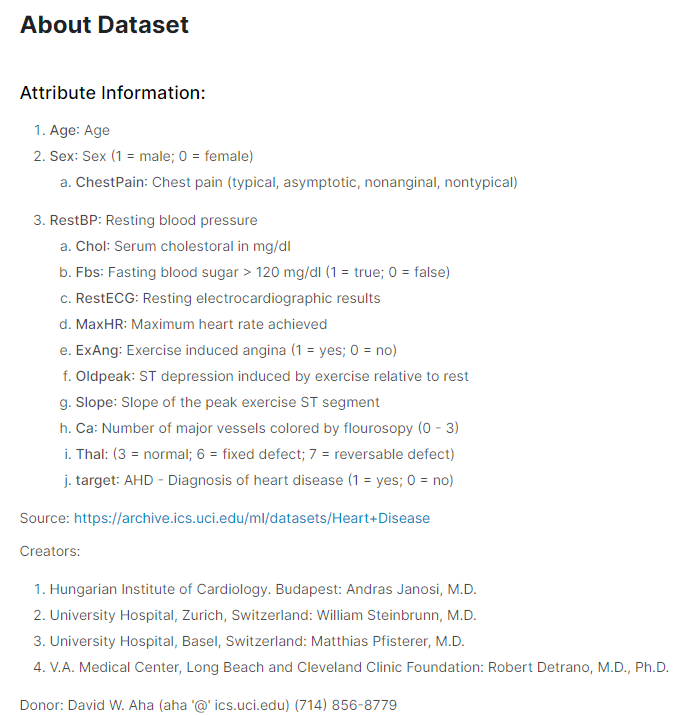

In [3]:
## Open Covid19 Data Set
df = pd.read_csv("heart.csv")

### Data Assessment

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


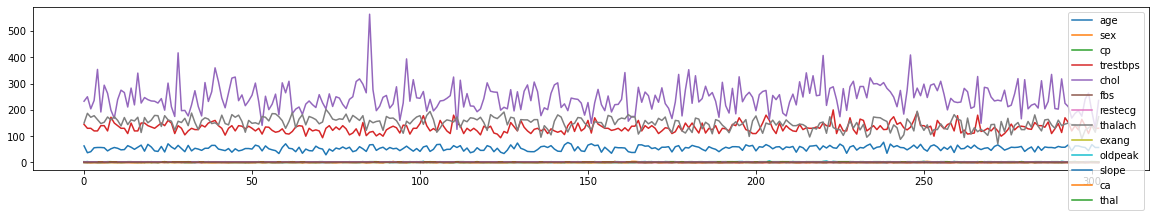

In [119]:
plt.plot(df)
plt.legend(labels = features)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Text(0.5, 1.0, 'Heart Disease')

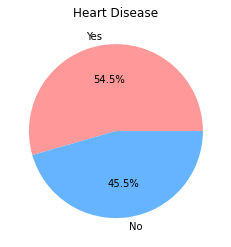

In [12]:
#What is the heart disease split in the data set?
x = df['target'].value_counts()
plt.pie(x, labels=['Yes', 'No'], autopct="%1.1f%%", colors = ['#ff9999','#66b3ff'])
plt.title('Heart Disease')

#Notes
#What's missing? Nearly a 50/50 split of data between targets (this almost NEVER happens)
#Target is also binary, Yes/No. When the reality of heart disease is certainly shades of gray

In [8]:
## Nan/Null & Missing Assessment
print('Percent Missing: ')
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


df_nan = df.loc[df.isnull().any(axis=1)]
df_nan.head()

Percent Missing: 
age - 0%
sex - 0%
cp - 0%
trestbps - 0%
chol - 0%
fbs - 0%
restecg - 0%
thalach - 0%
exang - 0%
oldpeak - 0%
slope - 0%
ca - 0%
thal - 0%
target - 0%


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


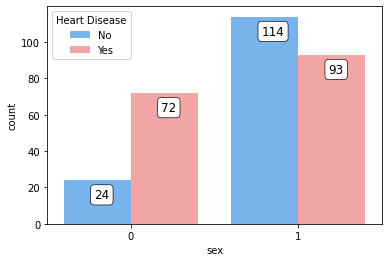

In [38]:
#How is the split between Men and Women? 1 = Male, 0 = Female
ax = sns.countplot(x ='sex', hue = "target",data = df, palette=['#66b3ff', '#ff9999'])
plt.legend(title='Heart Disease', loc='upper left', labels=['No', 'Yes'])
for p in ax.patches:
    value=p.get_height() 
    if value <0:
        continue
    x = p.get_x()+.18
    y = p.get_y() + p.get_height() - 10
    ax.text((x), (y), int(value), fontsize=12,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', linewidth=0.65))

#Note: Interesting that we have more men without heart disease than men with, yet we have exceedingly more women with HD
#      than without. Anecdotally this feels wrong compared to disase in population.

<AxesSubplot:>

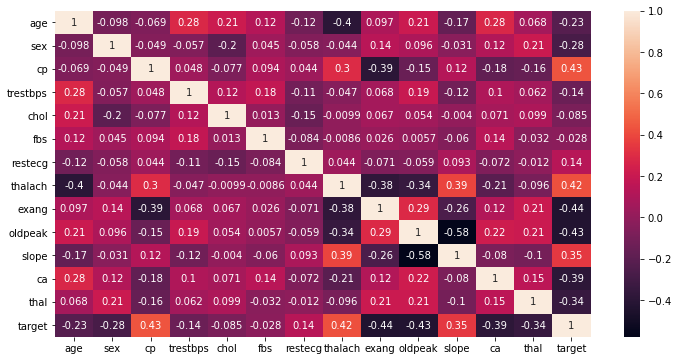

In [29]:
## Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

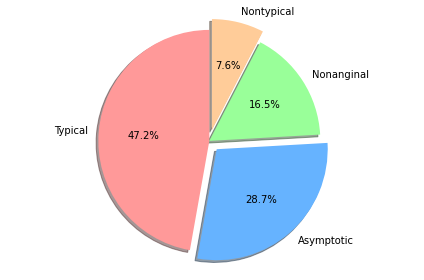

In [32]:
## Take a closer look at Chest Pain
labels = ['Typical', 'Asymptotic', 'Nonanginal', 'Nontypical']
lbl_cnt = df['cp'].value_counts()
explode = (0, 0.1, 0, 0.1)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(lbl_cnt, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

### Feature Engineering & Feature Selection

<b>Feature Engineering-----------------------------------------------------------</b>

In [33]:
## FEATURE ENGINEERING ##
# Ex:We have raw Cholesterol numbers (total serum). But suppose we wanted to convert that to a categorical to indicate
#    high cholesterol

## Table Below Taken from https://www.medicalnewstoday.com/articles/315900#recommended-levels #

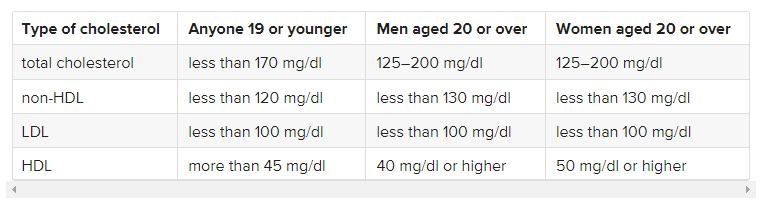

In [49]:
## Version 1: Binary Flag

## Define a function to determine high cholesterol level
def high_cholesterol(row):
    #skipping age <=19 as none exist in this dataset
    if row['sex'] == 0 and row['chol'] > 200:
        return 1
    elif row['sex'] == 0 and row['chol'] > 200:
        return 0
    elif row['sex'] == 1 and row['chol'] > 200:
        return 1
    elif row['sex'] == 1 and row['chol'] > 200:
        return 0

## Pass function with apply to dataframe
df['high_ch'] = df.apply(lambda row: high_cholesterol(row), axis = 1)

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  high_ch  
0   0     1       1      1.0  
1   0     2       1      1.0  
2   0     2       1      1.0  
3   0     2       1      1.0  
4   0     2       1      1.0  


<b>Keep in mind there is a lot to decide when feature engineering:</b>
- Should this be a binary flag (is or is not high cholesterol) OR
- Do we create categorical levels (low risk, medium risk, high risk)...
- Do we then remove the numeric cholesterol variable in the model if we use the categorical high_ch?

Other Feature Engineering Examples
- Time series t-1 variables
- NLP text extraction
- variable combinations (x*y) (x+y) (x^2)

<b>Feature Selection-----------------------------------------------------------</b>

In [55]:
## We already shared the correlation matrix which should give us a good idea already of what features are closely related
## Let's test as an example Cholesterol vs blood pressure (resting)

## Set high_ch flag to int
print('Values Range -1 to 1') # -1: Negatively Corr, 0: Uncorrellated, 1: Positively Correlated
## Pearson's Correlation (linear)
corr, _ = pearsonr(df['chol'], df['trestbps'])
print('Pearsons correlation Cholesterol vs resting BP: %.3f' % corr)

## Spearman's Correlation (non-linear)
corr, _ = spearmanr(df['chol'], df['trestbps'])
print('Spearmans correlation Cholesterol vs resting BP: %.3f' % corr)


Values Range -1 to 1
Pearsons correlation Cholesterol vs resting BP: 0.123
Spearmans correlation Cholesterol vs resting BP: 0.127


In [70]:
## Using PCA to reduce total variables

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features (we'll discuss this later)
x = StandardScaler().fit_transform(x)

In [71]:
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [73]:
## Run PCA
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca_1', 'pca_2', 'pca_3' ,'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 
                          'pca_10', 'pca_11', 'pca_12', 'pca_13'])

In [80]:
## View new df with pca
pca_df = pd.concat([principalDf, df[['target']]], axis = 1)
pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,target
0,0.624111,2.321270,2.474673,2.676239,0.375253,1.713567,-0.120352,0.736557,-0.638940,0.932651,-0.558115,0.404075,0.420221,1
1,-0.455988,-0.957351,1.139595,2.426838,2.273767,-0.787861,-0.081513,1.535384,1.241824,1.165681,-0.492133,0.232260,0.274274,1
2,-1.828805,0.042885,-0.452229,0.406415,0.867802,0.767551,-0.104852,-0.063523,1.293202,-1.147066,0.363725,0.177977,-1.109553,1
3,-1.716006,-0.495337,0.030631,-0.112162,-0.235598,-0.502665,-0.142754,-0.177462,-0.152965,0.706572,-0.700291,1.073581,-0.150895,1
4,-0.371356,0.301156,-2.841069,-0.809042,0.011389,-0.085495,1.415596,0.607134,-0.186315,0.907423,0.414451,0.884467,-0.069581,1


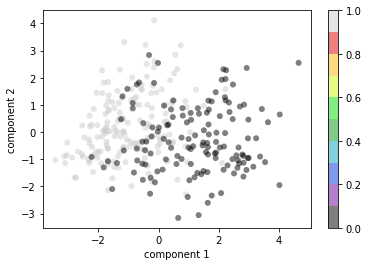

In [89]:
## Visualize
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=df.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## Scaling & Transformation

<AxesSubplot:xlabel='age', ylabel='Count'>

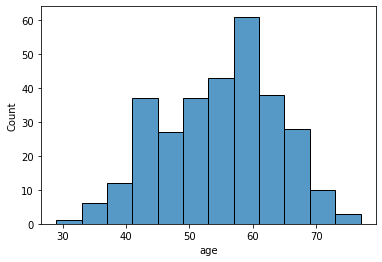

In [102]:
## Natural Log Transformation
sns.histplot(df.age)

<AxesSubplot:xlabel='age', ylabel='Count'>

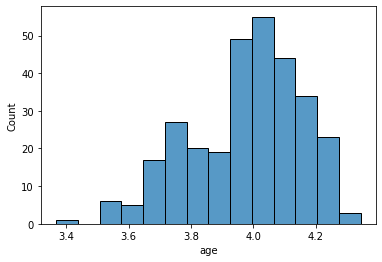

In [101]:
sns.histplot(np.log(df.age))

<AxesSubplot:xlabel='age_sc', ylabel='Count'>

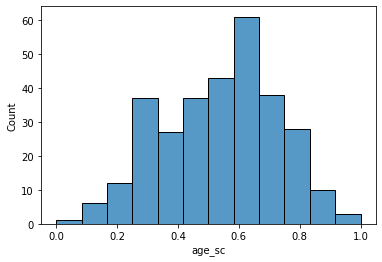

In [109]:
## Normalization (Min/Max Scaling)
## You can import libraries to scale for you, but let's do it manually here:
min_age = min(df.age)
max_age = max(df.age)

df['age_sc'] = ((df.age - min_age)) / ((max_age - min_age))
sns.histplot(df.age_sc)


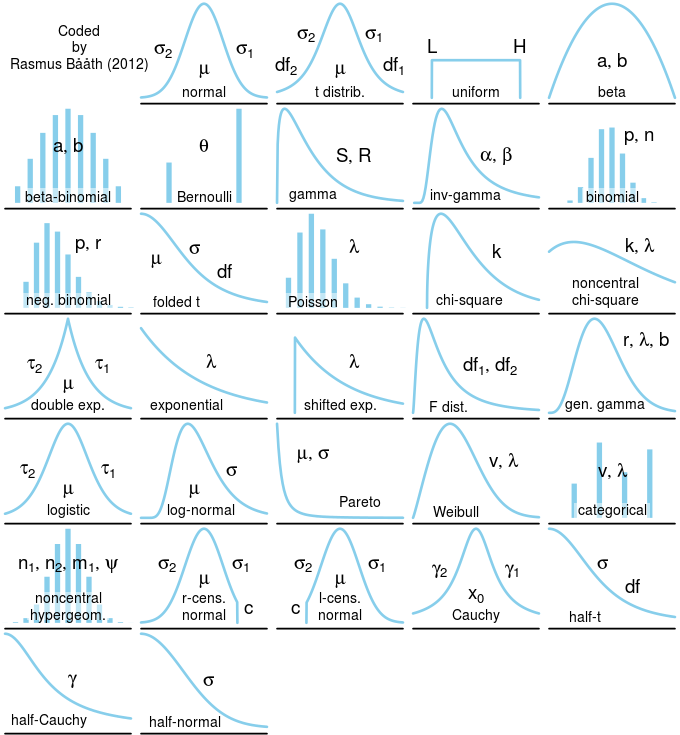

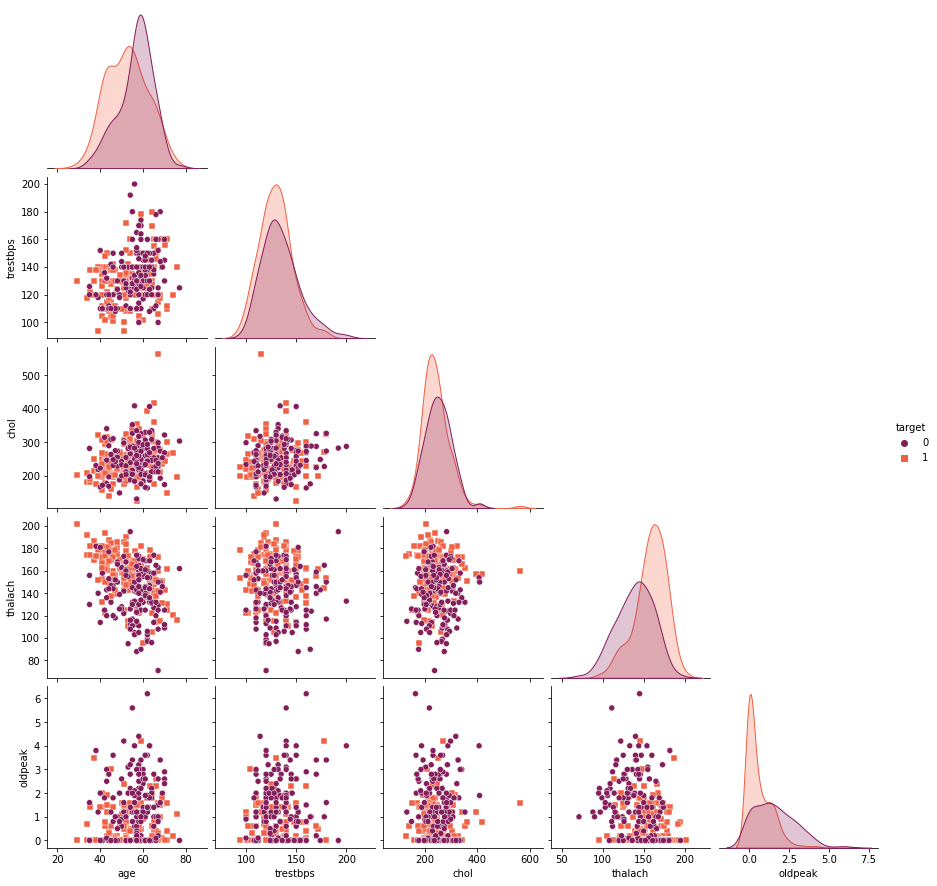

In [135]:
## Another Glance at Correlation b/w variables and their distribution, to evaluate if we need tranformations
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(df, hue='target', palette='rocket', vars = continuous_vars, kind = 'scatter', markers = ["o", "s"],
            corner = True, diag_kind = 'kde') #kernal density estimate

### Train, Validate, Test

In [123]:
sc=StandardScaler()
X,y=df.drop(['target'],axis=1),df['target']

sc.fit(X)
df_sc=pd.DataFrame(sc.transform(X),columns=df.columns[:-1])
df_sc['target']=df['target']

#Show newly scaled variables 
df_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_ch
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1,0.952197
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1,-1.915313
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1,-1.474158
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1,0.180175
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1,0.290464


In [128]:
## Split data into Train, Validate, and Test
X=df_sc.drop('target',axis=1)
y=df_sc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

#Print split dimensions
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((212, 14), (212,), (91, 14), (91,))

In [131]:
## Set models to compare
## Note: Models typically need to be 'tuned', here for demonstration purposes, we are using these models in default settings
classifiers=[LogisticRegression(),
             KNeighborsClassifier(),
             SVC(kernel='linear'),
             GaussianNB(),
             BernoulliNB(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             QuadraticDiscriminantAnalysis()]

In [132]:
## Create function to run classifiers
def predict(clf_list,score_list):
    for i in clf_list:
        i.fit(X_train,y_train)
        print('                ',i)
        print('Score =',i.score(X_test,y_test))
        print(confusion_matrix(y_test,i.predict(X_test)))
        print(classification_report(y_test,i.predict(X_test)))
        score_list.append(i.score(X_test,y_test))
        print('*'*80)
    return score_list

In [133]:
## Run classifiers
default_scores=[]
ds=predict(classifiers,default_scores)
ds

                 LogisticRegression()
Score = 0.7472527472527473
[[26 14]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        40
           1       0.75      0.82      0.79        51

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.74        91

********************************************************************************
                 KNeighborsClassifier()
Score = 0.8351648351648352
[[32  8]
 [ 7 44]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

********************************************************************************
              

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[0.7472527472527473,
 0.8351648351648352,
 0.7692307692307693,
 0.7912087912087912,
 0.8021978021978022,
 0.7912087912087912,
 0.7582417582417582,
 0.6923076923076923]

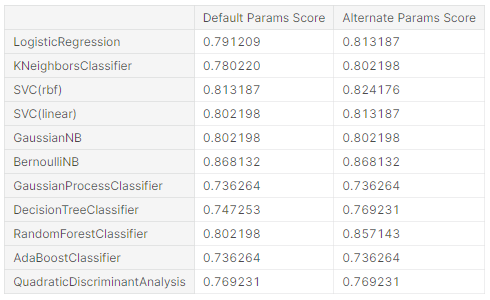

#### From GridSearch optimization done by Emre Kaplan, the above table shows the difference optimizatin can make it model performance, defualt performance on the left and optimized on the right.